# Занятие 3. Улучшение модели классификации лиц. Соревнование на Kaggle.

0. Baseline
1. Детектируем лица
2. Аугментации
3. Снижение размерности
4. HOG, SIFT
5. Kaggle и соревнование курса

# 0. Baseline-решение (с предыдущего занятия)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Загрузим датасет и сформируем выборку для решения задачи

In [3]:
import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


При загрузке фотографий приведем все фотографии к размеру 64x64 пикселя.

In [12]:
from tqdm import tqdm

dirname = "/gdrive/My Drive/Start_ML"
labels = ['AA', 'Adam_dawson', 'Boris Johnson', 'Dimas', 'Yury_M']

x, y = [], []

Crop = True

for label in labels:
    
    subdir = os.path.join(dirname, label)
    filelist = os.listdir(subdir)
    
    for fname in tqdm(filelist):
        img = cv2.imread(os.path.join(subdir, fname), cv2.IMREAD_GRAYSCALE)

        if Crop is True:
            img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
            face = face_cascade.detectMultiScale(img)
            for (a, b, w, h) in face:
                cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
                face = img[b:b + h, a:a + w]
        else:
           face = img


        try:
            h, w = face.shape
            size = min(h, w)
            h0 = int((h - size) / 2)
            w0 = int((w - size) / 2)
        
            img = face[h0: h0 + size, w0: w0 + size]
            img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
            x.append(img)
            y.append(label)
        except:
            print(f'no face found for {fname}')
len(x), len(y)

  1%|          | 1/129 [00:00<00:41,  3.10it/s]

no face found for фото1.jpg


  3%|▎         | 4/129 [00:00<00:24,  5.01it/s]

no face found for фото3.jpg


  5%|▍         | 6/129 [00:01<00:23,  5.19it/s]

no face found for фото5.jpg


  6%|▌         | 8/129 [00:01<00:21,  5.51it/s]

no face found for фото8.jpg


 11%|█         | 14/129 [00:02<00:22,  5.19it/s]

no face found for фото14.jpg


 14%|█▍        | 18/129 [00:03<00:17,  6.21it/s]

no face found for фото17.jpg
no face found for фото18.jpg


 15%|█▍        | 19/129 [00:03<00:17,  6.43it/s]

no face found for фото19.jpg


 21%|██        | 27/129 [00:04<00:09, 10.54it/s]

no face found for фото26.jpg


 24%|██▍       | 31/129 [00:04<00:09, 10.64it/s]

no face found for фото30.jpg


 27%|██▋       | 35/129 [00:05<00:08, 11.03it/s]

no face found for фото34.jpg


 30%|███       | 39/129 [00:05<00:08, 11.01it/s]

no face found for фото38.jpg
no face found for фото39.jpg


 33%|███▎      | 43/129 [00:05<00:07, 11.25it/s]

no face found for фото42.jpg
no face found for фото43.jpg


 38%|███▊      | 49/129 [00:06<00:06, 11.86it/s]

no face found for фото47.jpg


 41%|████      | 53/129 [00:06<00:06, 12.07it/s]

no face found for фото51.jpg
no face found for фото52.jpg


 49%|████▉     | 63/129 [00:07<00:05, 11.70it/s]

no face found for фото61.jpg


 53%|█████▎    | 69/129 [00:08<00:05, 11.27it/s]

no face found for фото67.jpg


 57%|█████▋    | 73/129 [00:08<00:04, 11.98it/s]

no face found for фото71.jpg
no face found for фото73.jpg


 60%|█████▉    | 77/129 [00:08<00:04, 11.83it/s]

no face found for фото75.jpg


 63%|██████▎   | 81/129 [00:09<00:04, 11.95it/s]

no face found for фото79.jpg
no face found for фото80.jpg


 69%|██████▉   | 89/129 [00:09<00:03, 11.62it/s]

no face found for фото88.jpg


 75%|███████▌  | 97/129 [00:10<00:02, 11.05it/s]

no face found for фото96.jpg


 78%|███████▊  | 101/129 [00:10<00:02, 11.15it/s]

no face found for фото99.jpg


 81%|████████▏ | 105/129 [00:11<00:02, 11.24it/s]

no face found for фото103.jpg


 84%|████████▍ | 109/129 [00:11<00:01, 11.20it/s]

no face found for фото108.jpg
no face found for фото110.jpg


 88%|████████▊ | 113/129 [00:12<00:01, 11.23it/s]

no face found for фото111.jpg
no face found for фото113.jpg


 92%|█████████▏| 119/129 [00:12<00:00, 11.77it/s]

no face found for фото117.jpg


 95%|█████████▌| 123/129 [00:12<00:00, 11.20it/s]

no face found for фото122.jpg


100%|██████████| 129/129 [00:13<00:00,  9.56it/s]

no face found for фото127.jpg
no face found for фото129.jpg



0it [00:00, ?it/s]
 14%|█▎        | 7/51 [00:00<00:04, 10.64it/s]

no face found for 220504112926-vid-thumbnail-boris-johnson-elections-1-full-169.jpg


 25%|██▌       | 13/51 [00:01<00:03,  9.55it/s]

no face found for GettyImages-1240895230-e1653647119659.webp
no face found for SEI_103550609-1-640x360.jpg


 31%|███▏      | 16/51 [00:01<00:04,  8.45it/s]

no face found for Boris-johnson-nottingham.jpg


 73%|███████▎  | 37/51 [00:03<00:01, 10.62it/s]

no face found for TELEMMGLPICT000288724195_trans_NvBQzQNjv4Bq4pr98MlWPHDghO8i0z8KQU9OcMq-s7IZ0kUph7oh7J4.jpeg
no face found for https___s3-images.ladbible.com_s3_content_5022f7055cad3b3bb4e70bcd851064c7.jpg


  4%|▍         | 2/52 [00:00<00:03, 15.34it/s]

no face found for Yury (33).jpg


 12%|█▏        | 6/52 [00:00<00:03, 12.71it/s]

no face found for Yury (2).jpg


 23%|██▎       | 12/52 [00:00<00:03, 12.85it/s]

no face found for Yury (29).jpg


 42%|████▏     | 22/52 [00:01<00:02, 12.92it/s]

no face found for Yury (38).jpg


100%|██████████| 52/52 [00:04<00:00, 12.96it/s]


(235, 235)

Переведем названия классов в целые числа

In [13]:
labels = {'AA' : 0, 'Adam_dawson' : 1, 'Boris Johnson' : 2, 'Dimas' : 3, 'Yury_M' : 4}

y = [labels[item] for item in y]

Нарисуем первые три изображения

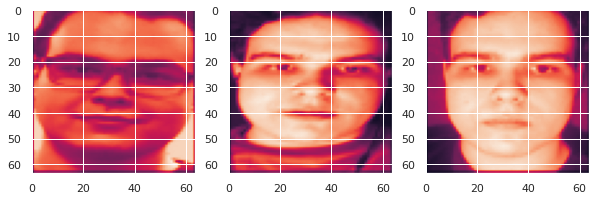

In [14]:
fig, axx = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img = x[i]
    axx[i].imshow(img)

В матрице объект-признак признаки объекта расположены в строке. Поэтому необходимо "растянуть" каждое изображение в вектор длины $64\cdot 64$.

In [15]:
data = np.asarray([el.ravel() for el in x])

Разобъем данные на обучающую и тестовые выборки, сохранив баланс классов (stratify = y).

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, stratify = y, random_state=42)

Обучим логистическую регрессию и оценим её качество (выборка сбалансированная, поэтому используем метрику accuracy).

In [17]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score

pred_lr = model_lr.predict(Xtest)

accuracy_score(ytest, pred_lr)

0.8813559322033898

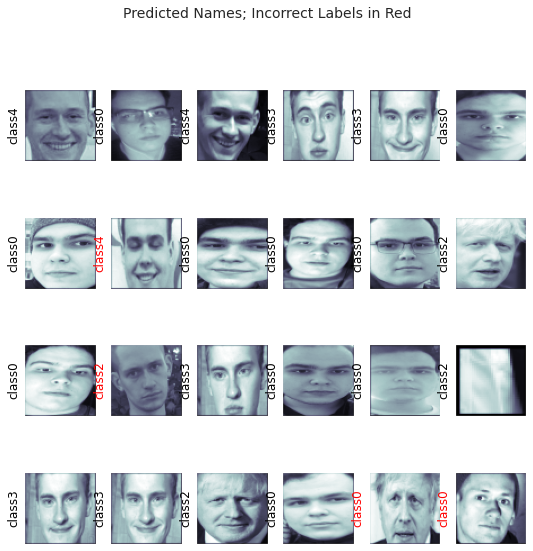

In [19]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel('class'+str(pred_lr[i]),
                   color='black' if pred_lr[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# 1. Детектируем лица. Каскады Хаара.

Для детекции лиц на изображениях мы будем использовать алгоритм под названием *каскад Хаара*.

Каскад Хаара - это алгоритм для детекции лиц на изображении, использующий так называемые Haar-like признаки.

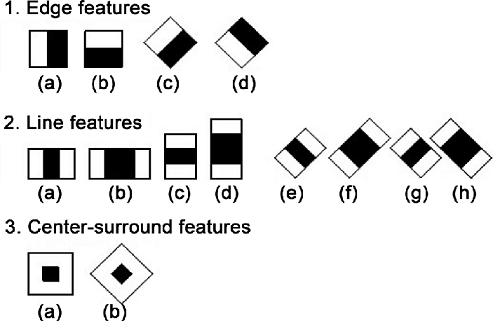

Мы накладываем эти признаки на изображение и с их помощью находим значимые переходы на лице (например, глаз-нос-глаз, лоб-глаза-брови), определяя наличие функции Хаара.

*Мы вычитаем среднее значение области темных пикселей из среднего значения области светлых пикселей. Если разность превышает некоторый порог, то мы считаем данную функцию Хаара существующей* (т.е. мы детектировали значимый переход на лице: например, глаз-нос-глаз).


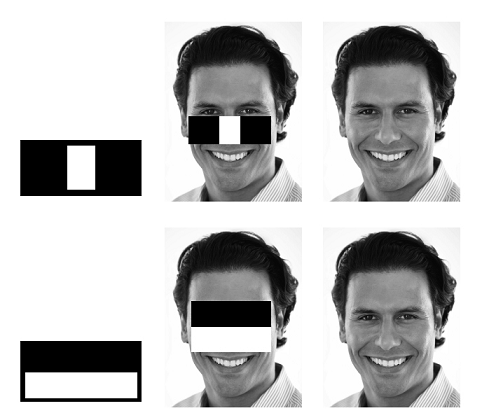

Применим каскады Хаара из библиотеки OpenCV для детекции лиц на изображениях, чтобы оставить на фотографиях только лица и обрезать фон. Это поможет нашему алгоритму лучше решить задачу классификации.

Чтобы использовать каскады Хаара, вернемся к коду выше и поставим флаг
$$Crop = True.$$ 

# 2. Аугментация

***Аугментация*** изображений используется в задачах компьютерного зрения для повышения качества моделей. Цель аугментации - создать новые обучающие объекты из существующих данных.

*Albumentations* - это библиотека, в которой реализованы различные методы аугментации изображений. Сегодня мы будем пользоваться этой библиотекой.

Примеры аугментаций:

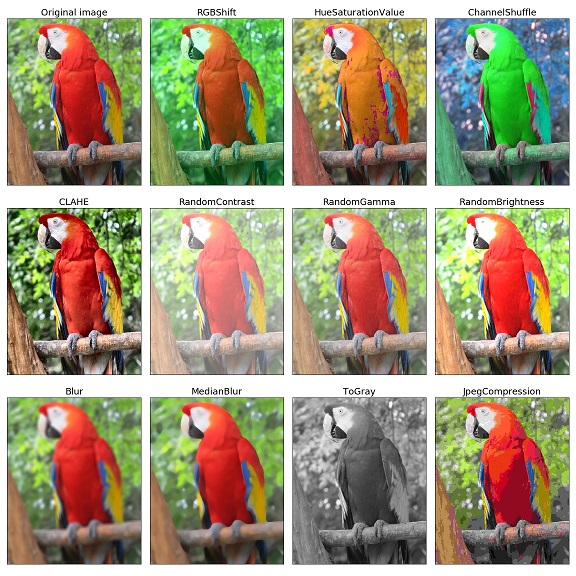

Давайте посмотрим на [ноутбук](https://colab.research.google.com/github/albumentations-team/albumentations_examples/blob/colab/example.ipynb) с примерами аугментаций с использованием albumentations.

Для примера в качестве аугментаций используем:
*    повороты на малые углы
*    небольшие сдвиги
*    зеркальное отражение относительно вертикали

In [ ]:
import random
import albumentations as A

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

def get_aug(image):
    angle = np.arange(-10,11,1)
    angle0 = random.choice(angle)

    shift = 0.01*np.arange(-10,11,1)
    shift0 = random.choice(shift)

    transform = A.ShiftScaleRotate(shift_limit=shift0,rotate_limit=angle0,scale_limit=0,p=0.5)
    
    augmented_image = transform(image=image)['image']

    transform = A.HorizontalFlip(p=0.5)

    return transform(image=augmented_image)['image']

Разобъем данные на обучающую и тестовые выборки, сохранив баланс классов (stratify = y).

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, stratify = y, random_state=42)

In [ ]:
len(Xtrain), len(Xtest)

(176, 59)

Из каждого тренировочного изображения при помощи аугментаций получим три изображения (увеличим тренировочную выборку в три раза).

In [ ]:
XtrainAug = []
ytrainAug = []

for (a,b) in zip(Xtrain,ytrain):
    for i in range(3):
      XtrainAug.append(get_aug(a))
      ytrainAug.append(b)

In [ ]:
XtrainAug = np.asarray([el.ravel() for el in XtrainAug])
Xtest = np.asarray([el.ravel() for el in Xtest])

In [ ]:
XtrainAug.shape, Xtest.shape

((528, 4096), (59, 4096))

Обучим логистическую регрессию и оценим её качество (выборка сбалансированная, поэтому используем метрику accuracy).

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(XtrainAug, ytrainAug)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

pred_lr = model_lr.predict(Xtest)

accuracy_score(ytest, pred_lr)

0.847457627118644

# 3. Снижение размерности

Мы работаем с объектами размера $64\times 64=4096$ пикселей. То есть каждый объект описывается 4096 признаками. Это довольно много, и кроме того не все эти признаки для нас информативны.

Мы можем воспользоваться ***методом главных компонент*** для снижения размерности пространства признаков.

Метод главных компонент (Principal Components Analysis, PCA) - это линейный метод снижения размерности, идея которого заключается в следующем:
*     мы конструируем новые признаки как линейные комбинации старых признаков
*     число новых признаков $\leq$ числа исходных признаков
*     новые признаки подбираются таким образом, чтобы сохранить максимальное количество информации о данных.

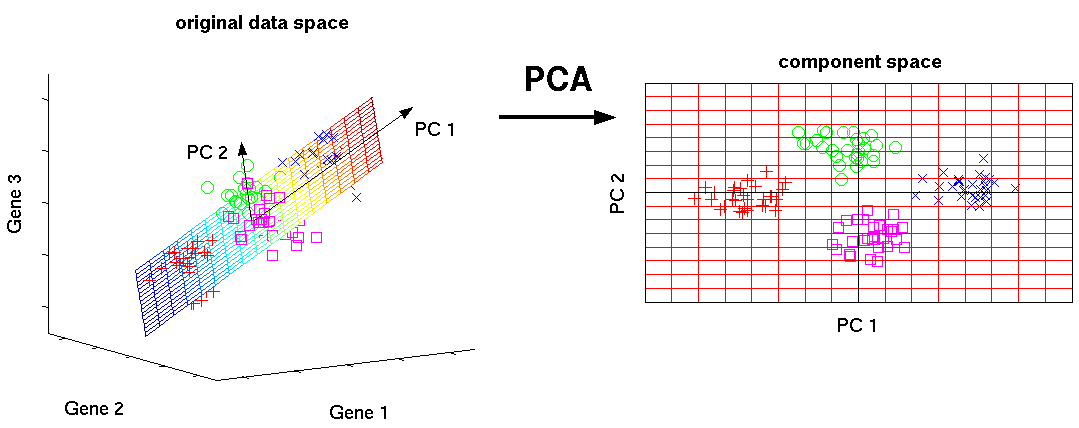

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline

pca = KernelPCA(n_components=200, kernel='poly', random_state=42)
model_lr = LogisticRegression()

model = make_pipeline(pca, model_lr)

model.fit(XtrainAug, ytrainAug)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('kernelpca',
                 KernelPCA(kernel='poly', n_components=200, random_state=42)),
                ('logisticregression', LogisticRegression())])

In [ ]:
from sklearn.metrics import accuracy_score

pred_lr = model.predict(Xtest)

accuracy_score(ytest, pred_lr)

0.8983050847457628

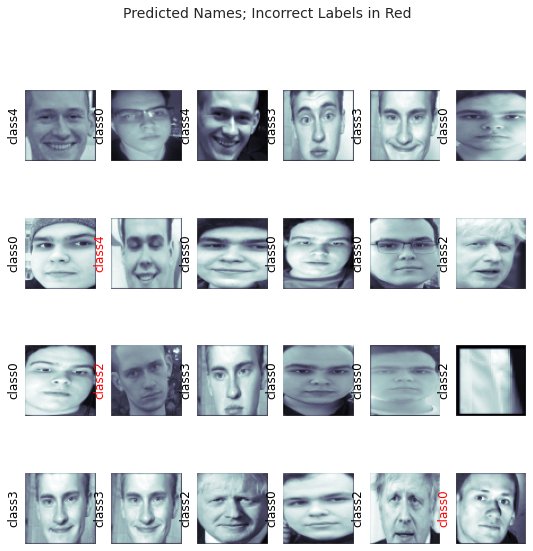

In [ ]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel('class'+str(pred_lr[i]),
                   color='black' if pred_lr[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# 4. HOG, SIFT 

Существуют подходы для извлечения смысловых признаков из изображений. Одни из самых известных классических подходов - это HOG и SIFT. В рамках этого курса мы не будем подробно разбирать эти подходы, но для решения задачи соревнования вы можете попробовать разобраться с ними самостоятельно и применить их для улучшения качества предсказательной модели.

*     **HOG - гистограмма направленных градиентов** - это подход, заключающийся в детекции резких переходов интенсивности цвета на изображении. Подход полезен для задач детекции и классификации изображений. Подробнее [здесь](https://habr.com/ru/post/306568/).

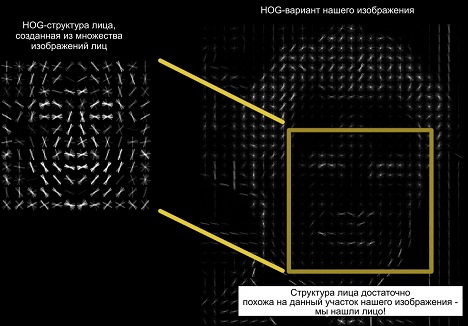

*     **SIFT - Scale Invariant Feature Transform** - метод выделения особых точек и их дескрипторов на изображении. Метод определяет ключевые точки изображения и их ориентацию на основе локального градиента изображения, а также вычисляет их дескрипторы (векторы, характеризующие ключевые точки). Подробнее [здесь](https://habr.com/ru/post/106302/).

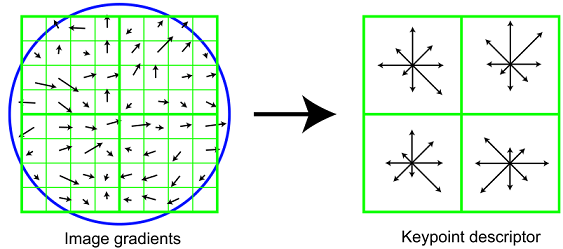

# 5. Kaggle

Загрузим тренировочные данные с Google Drive и извлечем номера классов из названий изображений.

In [ ]:
from tqdm import tqdm

dirname = "/gdrive/My Drive/ML_track_train"

Xtrain, ytrain = [], []

for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    ytrain.append(int(fname.split('label')[1].split('.png')[0]))
        
    h, w = img.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = img[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    Xtrain.append(img)

len(Xtrain), len(ytrain)

100%|██████████| 313/313 [00:05<00:00, 56.23it/s] 


(313, 313)

Загрузим тестовые изображения из Google Drive. 

Тестовые изображения загружаются в произвольном порядке, поэтому сделаем сортировку по номерам, указанным в названиях изображений.

In [ ]:
def sort_by_index(fname):
    return int(fname.split('.')[0].split('image')[1])

In [ ]:
from tqdm import tqdm

dirname = "/gdrive/My Drive/ML_track_val"

Xtest = []
Names = []

for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    Names.append(fname)
        
    h, w = img.shape
    size = min(h, w)
    h0 = int((h - size) / 2)
    w0 = int((w - size) / 2)
        
    img = img[h0: h0 + size, w0: w0 + size]
    img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
    Xtest.append(img)

len(Xtest)

100%|██████████| 2090/2090 [00:06<00:00, 322.63it/s]


2090

Обучим baseline-модель (логистическую регрессию без дополнительных шагов) и сделаем предсказание.

In [ ]:
from sklearn.linear_model import LogisticRegression

Xtrain = np.asarray([el.ravel() for el in Xtrain])

model_lr = LogisticRegression()
model_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Xtest = np.asarray([el.ravel() for el in Xtest])
pred_lr = model_lr.predict(Xtest)

Сохраним предсказание в виде, который требуется в соревновании и сохраним файл с предсказаниями.

In [ ]:
import pandas as pd

pred_df = pd.DataFrame(list(zip(Names, pred_lr)), columns = ['img_name', 'pred_class'])
pred_df.head()

,img_name,pred_class
0,image0.png,0
1,image1.png,3
2,image2.png,0
3,image3.png,4
4,image4.png,3


In [ ]:
pred_df.to_csv("first_submission.csv", index=False)